# 1. Importing libraries & reading cleaned training data

In [34]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
df= pd.read_csv('data/cleaned_train_dataset.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(20)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
5,7,Puma,Canvas,Small,1.0,Yes,Yes,Backpack,Blue,21.488864,27.15815
6,8,Under Armour,Polyester,Medium,8.0,Yes,No,Tote,Gray,10.207780,25.98652
7,9,Under Armour,Nylon,Medium,2.0,Yes,Yes,Messenger,Pink,15.895100,38.48741
8,12,Adidas,Nylon,Medium,5.0,Yes,No,Backpack,Blue,15.872050,111.80791
9,13,Under Armour,Leather,Medium,8.0,No,No,Tote,Red,26.079409,26.37209


In [36]:
df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,246686.000000,246686.000000,246686.000000,246686.000000
mean,150048.329557,5.448984,18.016588,81.582528
std,86604.008063,2.886397,6.964860,38.939976
min,0.000000,1.000000,5.000000,15.000000
25%,75041.250000,3.000000,12.076210,47.759870
50%,150108.500000,5.000000,18.048580,81.226310
75%,224949.750000,8.000000,23.990489,115.006480
max,299999.000000,10.000000,29.999796,150.000000


# 2. Exploratory Data Analysis

### 2.1 Countplot of Categorical columns

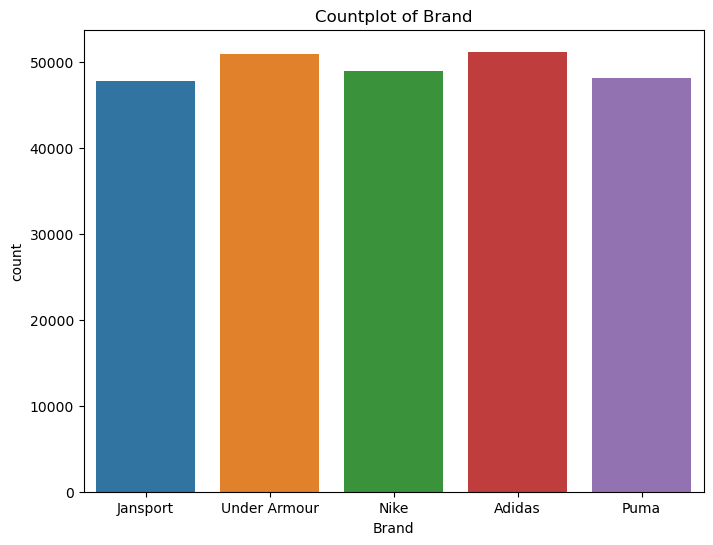

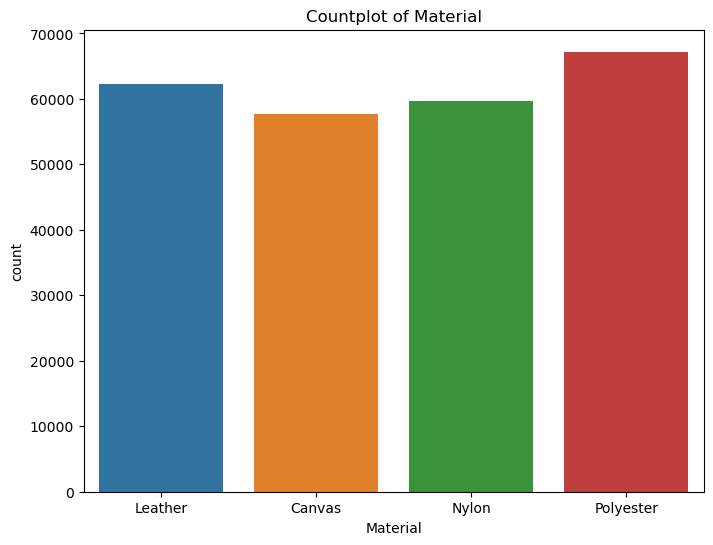

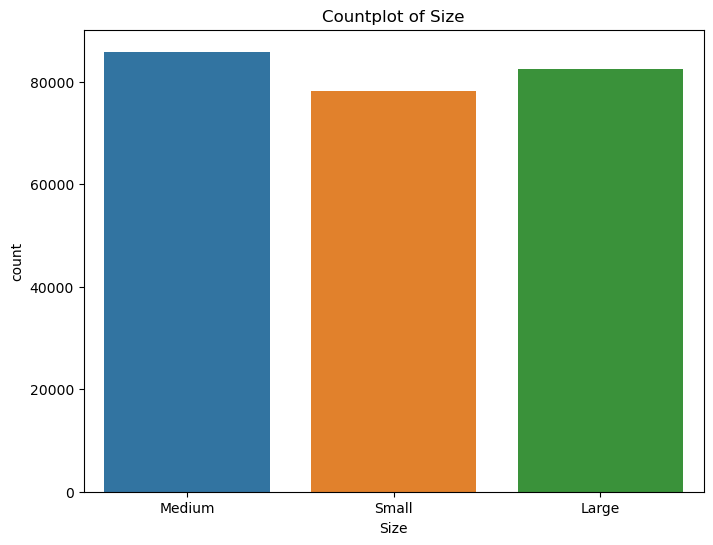

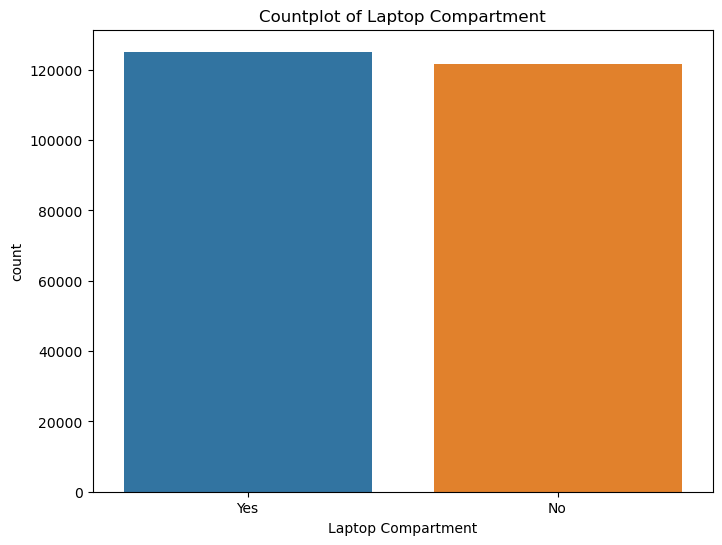

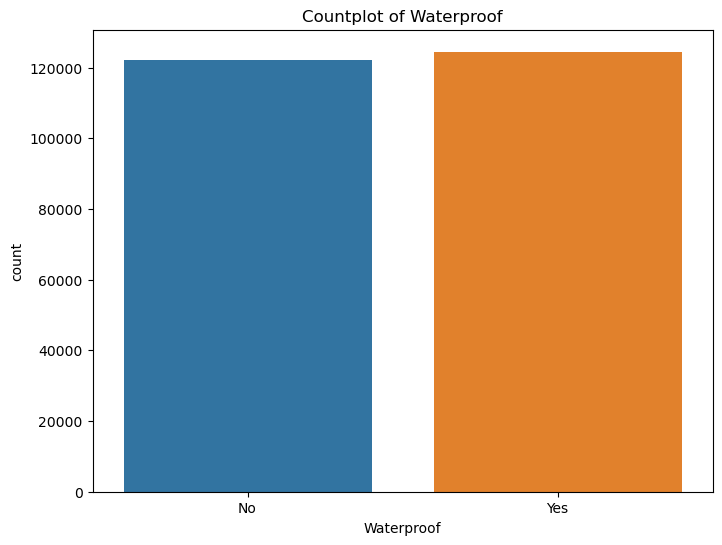

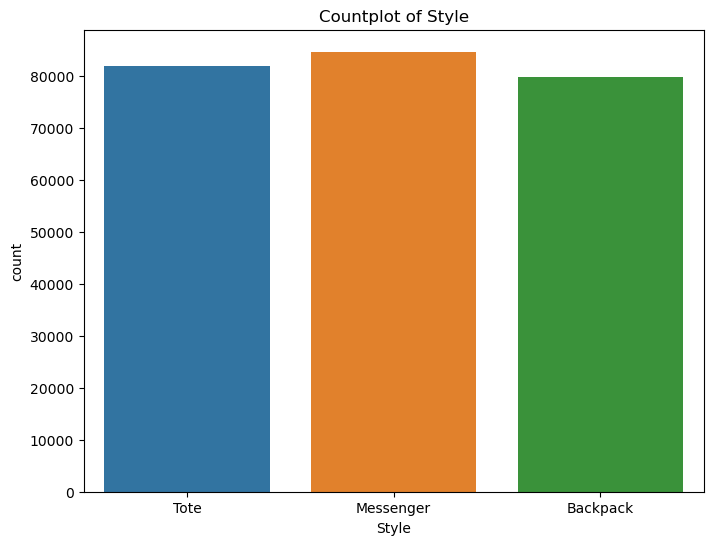

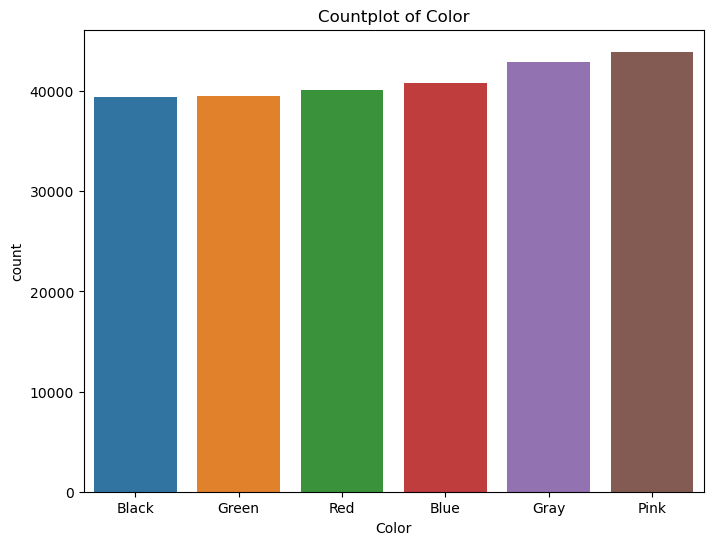

In [37]:
categorical_cols = df.select_dtypes('object','category').columns.tolist()
for i in categorical_cols:
    plt.figure(figsize= (8,6))
    sb.countplot(x=df[i])
    plt.title(f"Countplot of {i}")
    plt.show()

### 2.2 Univariate Analysis (For categorical columns)

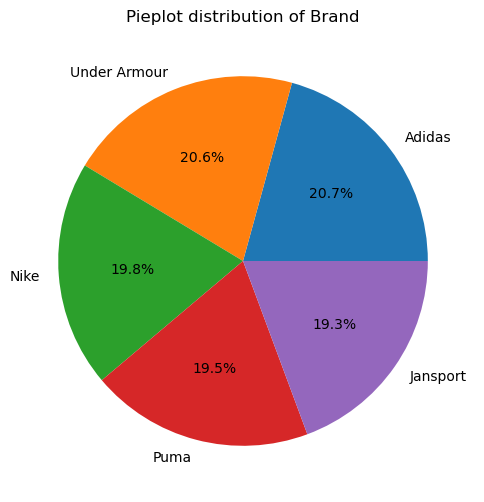

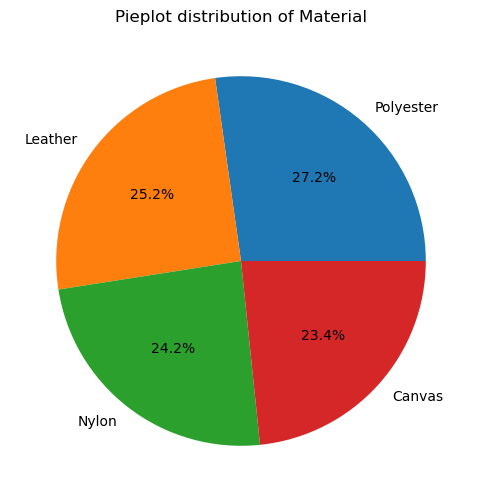

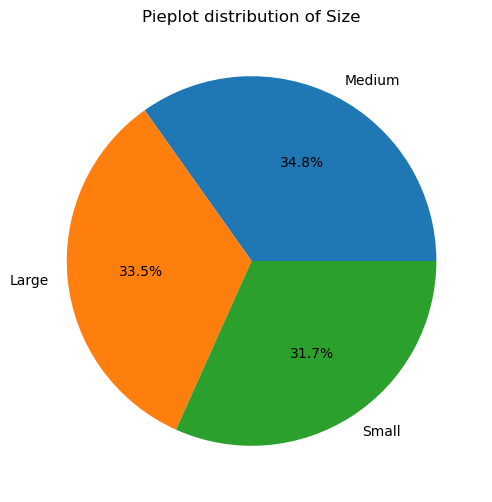

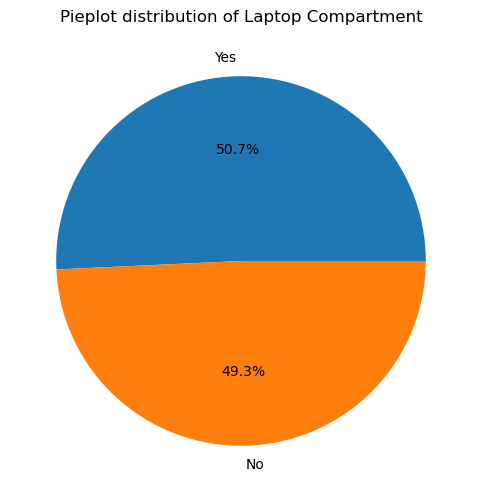

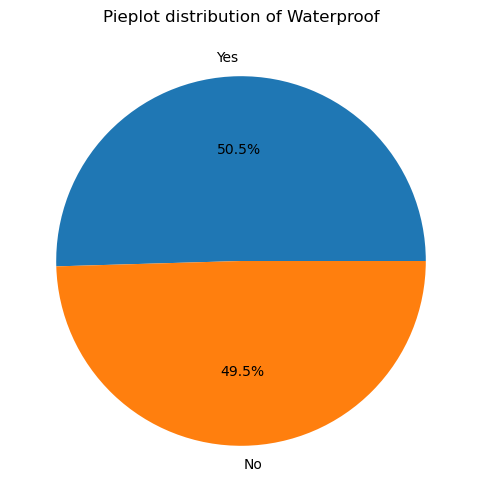

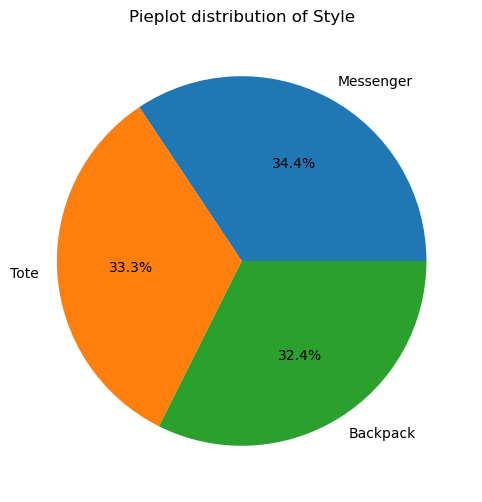

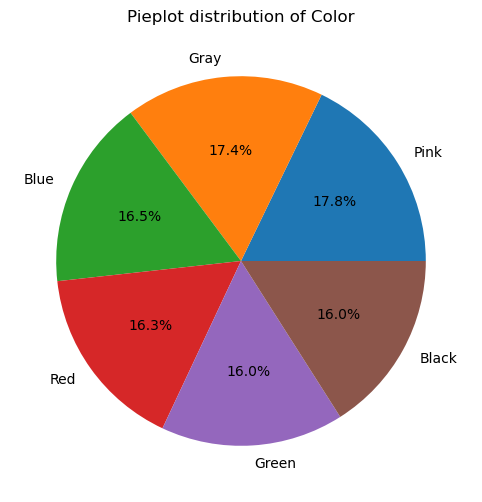

In [38]:
categorical_cols = df.select_dtypes('object','category').columns.tolist()

for i in categorical_cols:
    plt.figure(figsize=(8,6))
    plt.pie(df[i].value_counts(),labels = df[i].value_counts().index,autopct='%1.1f%%')
    plt.title(f"Pieplot distribution of {i}")

### 2.3 Univariate Analysis (For Numerical columns)

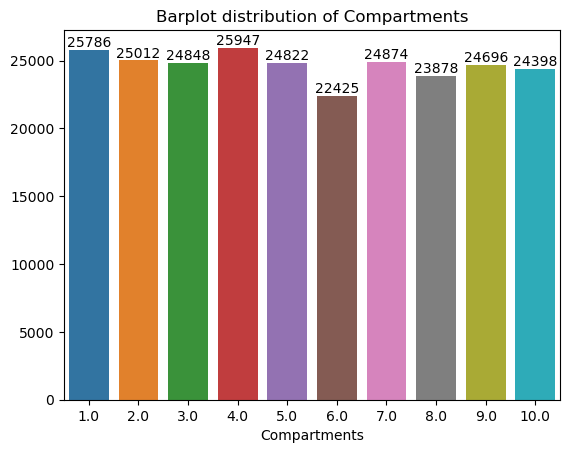

In [39]:
ax  = sb.barplot(x=df['Compartments'].value_counts().index,
           y=df['Compartments'].value_counts().values)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Barplot distribution of Compartments")
plt.show()

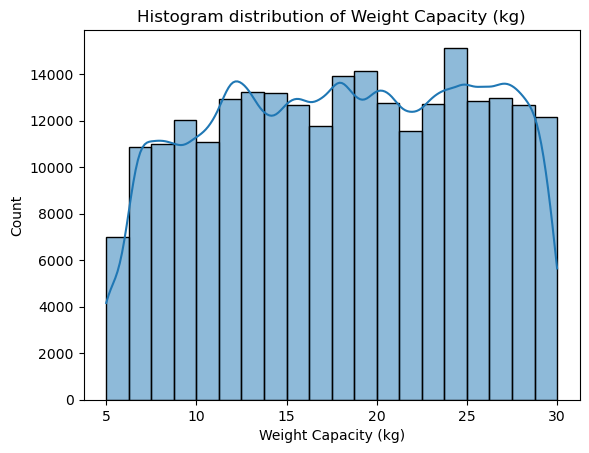

In [40]:
sb.histplot(x=df['Weight Capacity (kg)'],bins=20,kde=True)
plt.title("Histogram distribution of Weight Capacity (kg)")
plt.show()

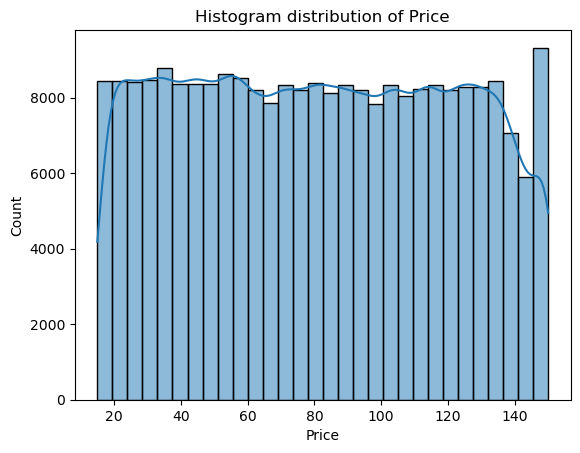

In [41]:
sb.histplot(x=df['Price'], kde=True, bins=30)
plt.title("Histogram distribution of Price")
plt.show()


### 2.3 Bivariate Analysis

#### 2.3.1 Bivariate Analysis b/w target column "Price" & other categorical columns

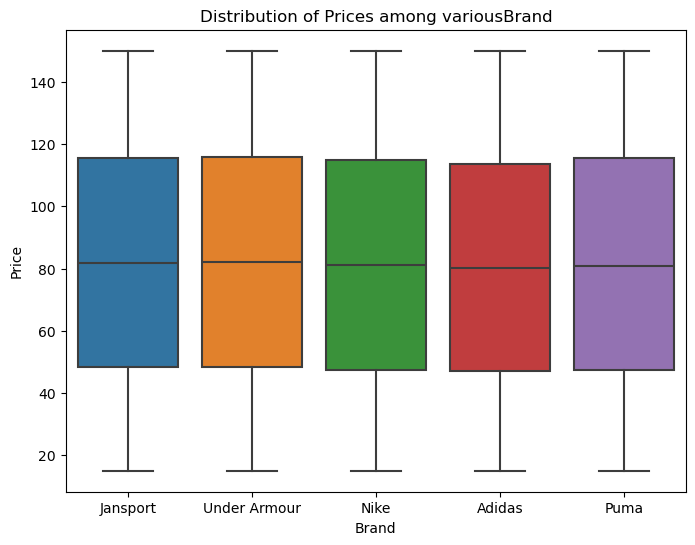

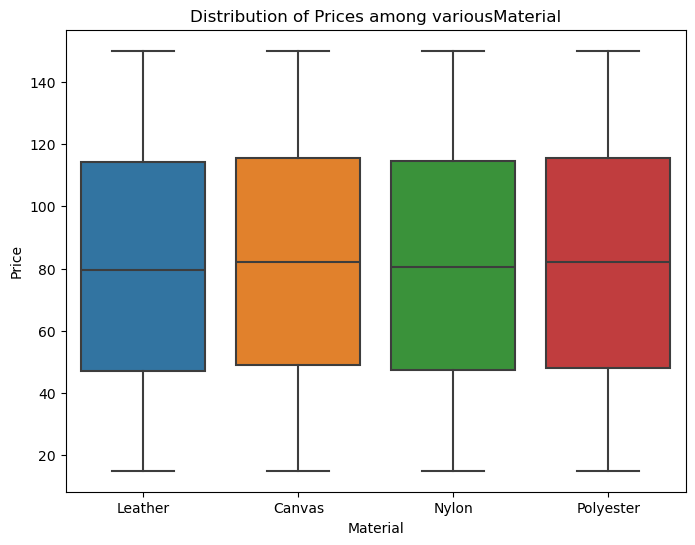

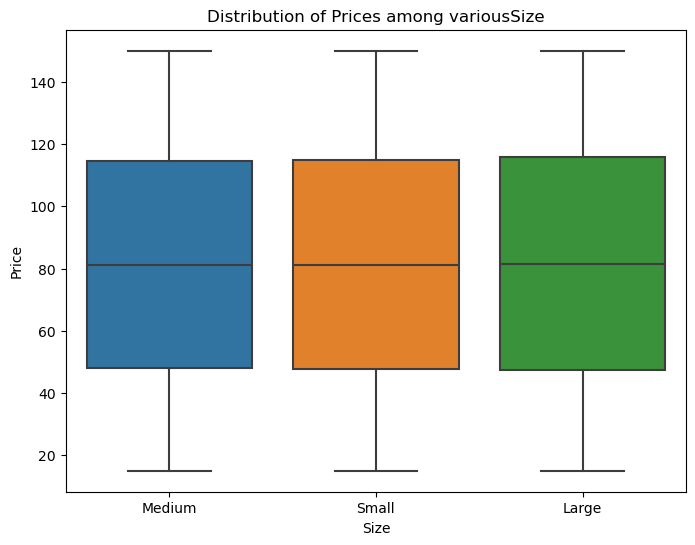

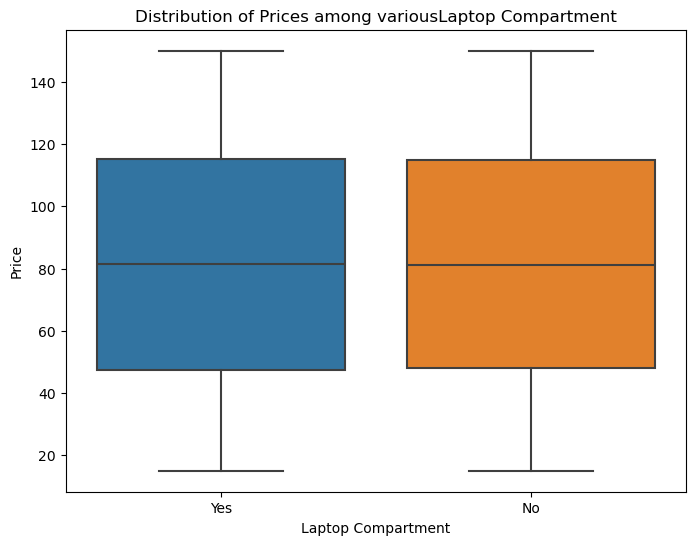

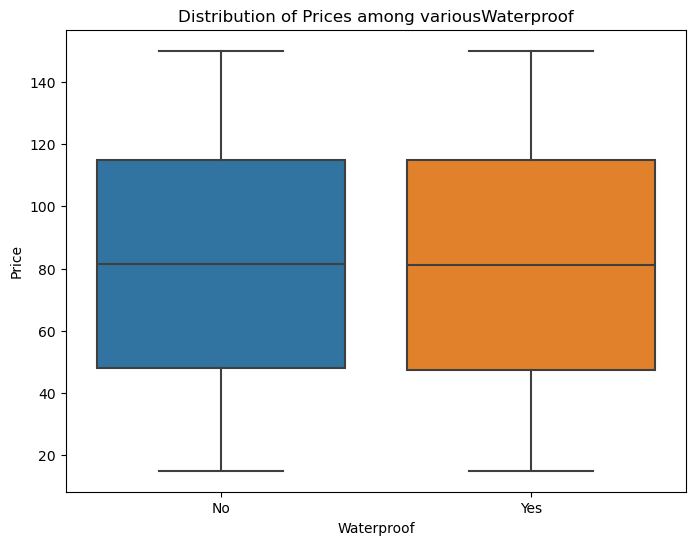

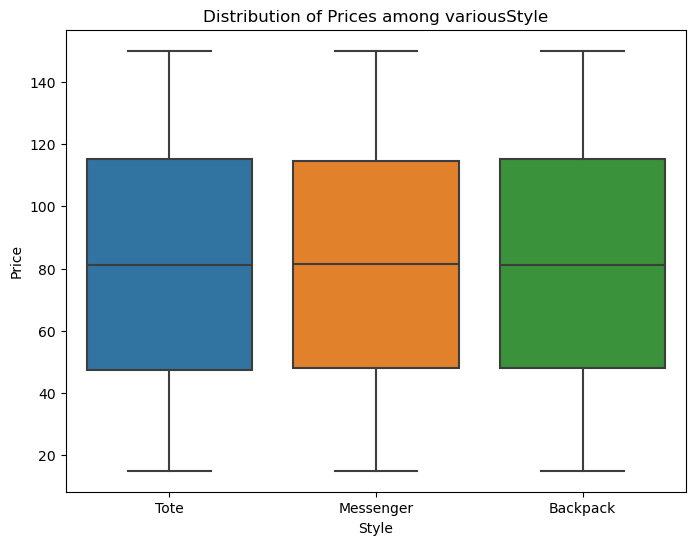

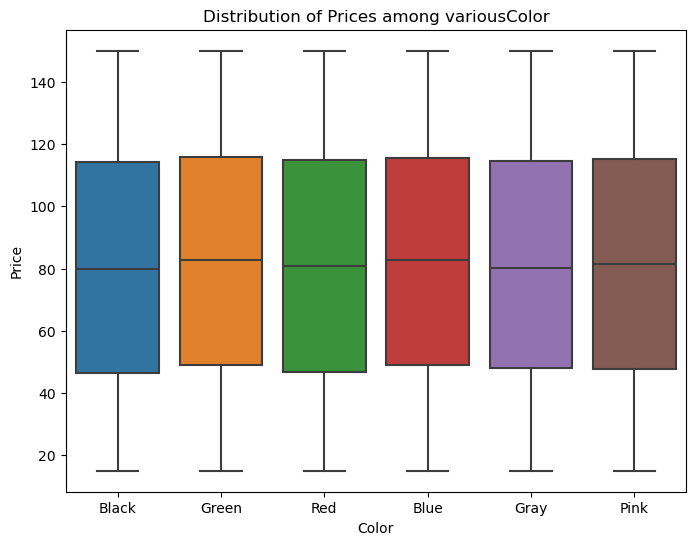

In [42]:
for i in categorical_cols:
    plt.figure(figsize= (8,6))
    sb.boxplot(x=df[i], y =df['Price'])
    plt.title(f"Distribution of Prices among various{i}")
    plt.show()

#### 2.3.2 Bivariate Analysis b/w numerical columns

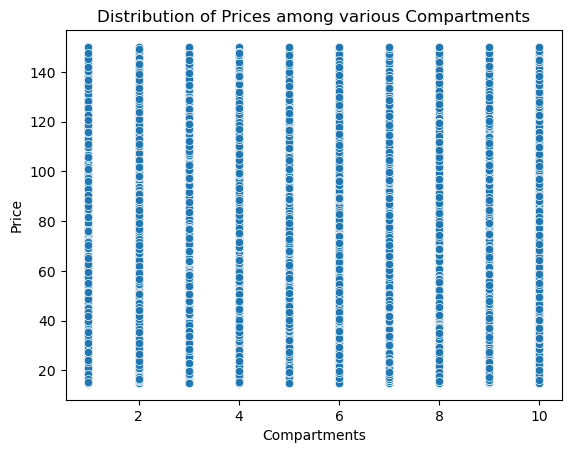

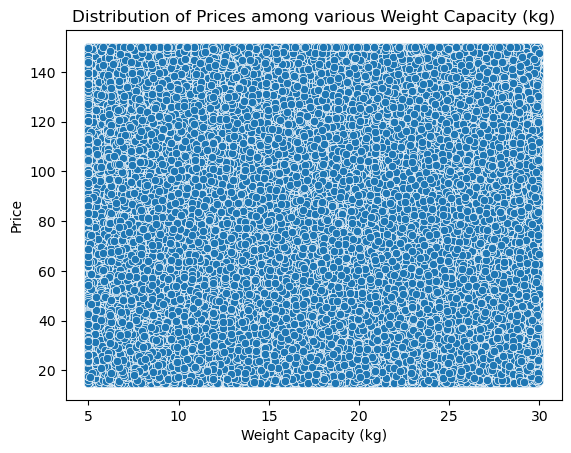

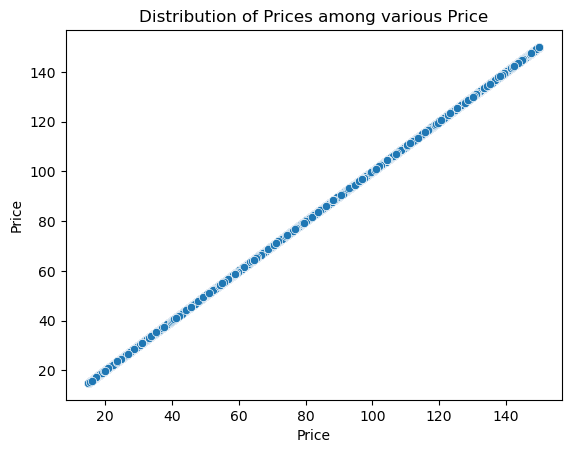

In [43]:
numerical_cols = df.select_dtypes(include=['number']).columns.to_list()
for i in range(1,len(numerical_cols)):
    sb.scatterplot(x=df[numerical_cols[i]], y = df['Price'])
    plt.title(f"Distribution of Prices among various {numerical_cols[i]}")
    plt.show()


### 2.4 Co-Relation Heatmap

#### 2.4.1 Since it requires to convert categorical columns into numerical ones, as I want a combined heatmap, let's convert them into dummy variables 

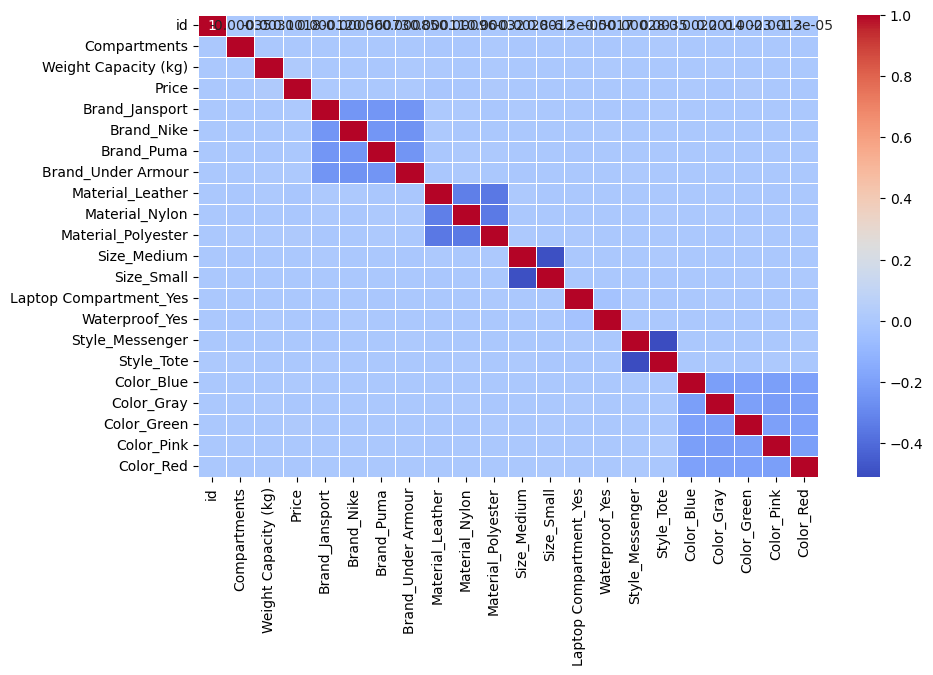

In [44]:
# Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(10, 6))
sb.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()